# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [843]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [845]:
ds = pd.read_csv('RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.✅
* Check the shape of the data to understand its structure.✅
* View the the data with various functions to get an initial sense of the data.✅
* Perform summary statistics on the dataset to grasp central tendencies and variability.✅
* Check for null values.✅
* Check for duplicated data.✅

And apply more if needed!

In [847]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [848]:
ds.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [849]:
ds.shape

(12316, 32)

In [850]:
ds.head(4)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury


In [851]:
ds.tail(6)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12310,9:05:00,Friday,18-30,Male,NaN,Employee,NaN,Special vehicle,Owner,Above 10yr,...,Reversing,Passenger,Male,Over 51,3,Employee,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [852]:
ds.sample(3)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
11872,13:00:00,Thursday,18-30,Male,Junior high school,Employee,5-10yr,NaN,Owner,NaN,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
10037,9:05:00,Monday,Unknown,Female,Junior high school,Employee,1-2yr,Public (13?45 seats),Owner,Below 1yr,...,Moving Backward,Driver or rider,Female,Over 51,2,Self-employed,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
734,18:30:00,Sunday,Over 51,Male,Junior high school,Employee,2-5yr,Public (12 seats),Owner,NaN,...,Unknown,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury


In [853]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [854]:
ds.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [855]:
print('the numbers of null values is :', ds.isnull().sum().sum())

the numbers of null values is : 20057


In [856]:
ds.duplicated().sum()

0

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.✅
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.✅
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.✅

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [858]:
ds["Educational_level"].mode()

0    Junior high school
Name: Educational_level, dtype: object

In [859]:
ds["Educational_level"].fillna("Junior high school", inplace = True)

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_16633/2949047543.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds["Educational_level"].fillna("Junior high school", inplace = True)


In [860]:
ds['Vehicle_driver_relation'].mode()

0    Employee
Name: Vehicle_driver_relation, dtype: object

In [861]:
ds["Vehicle_driver_relation"].fillna("Employee", inplace = True)

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_16633/594918555.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds["Vehicle_driver_relation"].fillna("Employee", inplace = True)


In [862]:
ds["Driving_experience"].mode()

0    5-10yr
Name: Driving_experience, dtype: object

In [863]:
ds["Driving_experience"].fillna("5-10yr", inplace = True)

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_16633/1453183742.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds["Driving_experience"].fillna("5-10yr", inplace = True)


In [864]:
ds["Type_of_vehicle"].mode()

0    Automobile
Name: Type_of_vehicle, dtype: object

In [865]:
ds["Type_of_vehicle"].fillna("Automobile", inplace = True)

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_16633/3416212222.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds["Type_of_vehicle"].fillna("Automobile", inplace = True)


In [866]:
ds["Owner_of_vehicle"].mode()

0    Owner
Name: Owner_of_vehicle, dtype: object

In [867]:
ds["Owner_of_vehicle"].fillna("Owner", inplace = True)

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_16633/1873516149.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds["Owner_of_vehicle"].fillna("Owner", inplace = True)


In [868]:
ds["Service_year_of_vehicle"].mode()

0    Unknown
Name: Service_year_of_vehicle, dtype: object

In [869]:
ds["Service_year_of_vehicle"].fillna("Unknown", inplace = True)

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_16633/1354022809.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds["Service_year_of_vehicle"].fillna("Unknown", inplace = True)


In [870]:
ds["Defect_of_vehicle"].mode()

0    No defect
Name: Defect_of_vehicle, dtype: object

In [871]:
ds["Defect_of_vehicle"].fillna("No defect", inplace = True)

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_16633/604610608.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds["Defect_of_vehicle"].fillna("No defect", inplace = True)


In [872]:
ds["Area_accident_occured"].mode()

0    Other
Name: Area_accident_occured, dtype: object

In [873]:
ds["Area_accident_occured"].fillna("Other", inplace = True)

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_16633/555316591.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds["Area_accident_occured"].fillna("Other", inplace = True)


In [874]:
ds["Lanes_or_Medians"].mode()

0    Two-way (divided with broken lines road marking)
Name: Lanes_or_Medians, dtype: object

In [875]:
ds["Lanes_or_Medians"].fillna("Two-way (divided with broken lines road marking)", inplace = True)

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_16633/3579220674.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds["Lanes_or_Medians"].fillna("Two-way (divided with broken lines road marking)", inplace = True)


In [876]:
ds["Road_allignment"].mode()

0    Tangent road with flat terrain
Name: Road_allignment, dtype: object

In [877]:
ds["Road_allignment"].fillna("Tangent road with flat terrain", inplace = True)

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_16633/2435314293.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds["Road_allignment"].fillna("Tangent road with flat terrain", inplace = True)


In [878]:
ds["Types_of_Junction"].mode()

0    Y Shape
Name: Types_of_Junction, dtype: object

In [879]:
ds["Types_of_Junction"].fillna("Y Shape", inplace = True)

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_16633/575431409.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds["Types_of_Junction"].fillna("Y Shape", inplace = True)


In [880]:
ds["Road_surface_type"].mode()

0    Asphalt roads
Name: Road_surface_type, dtype: object

In [881]:
ds["Road_surface_type"].fillna("Asphalt roads", inplace = True)

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_16633/3691544869.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds["Road_surface_type"].fillna("Asphalt roads", inplace = True)


In [882]:
ds["Type_of_collision"].mode()

0    Vehicle with vehicle collision
Name: Type_of_collision, dtype: object

In [883]:
ds["Type_of_collision"].fillna("Vehicle with vehicle collision", inplace = True)

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_16633/2624807952.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds["Type_of_collision"].fillna("Vehicle with vehicle collision", inplace = True)


In [884]:
ds["Vehicle_movement"].mode()

0    Going straight
Name: Vehicle_movement, dtype: object

In [885]:
ds["Vehicle_movement"].fillna("Going straight", inplace = True)

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_16633/2478591296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds["Vehicle_movement"].fillna("Going straight", inplace = True)


In [886]:
ds["Work_of_casuality"].mode()

0    Driver
Name: Work_of_casuality, dtype: object

In [887]:
ds["Work_of_casuality"].fillna("Driver", inplace = True)

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_16633/3889968620.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds["Work_of_casuality"].fillna("Driver", inplace = True)


In [888]:
ds["Fitness_of_casuality"].mode()

0    Normal
Name: Fitness_of_casuality, dtype: object

In [889]:
ds["Fitness_of_casuality"].fillna("Normal", inplace = True)

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_16633/1033869007.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds["Fitness_of_casuality"].fillna("Normal", inplace = True)


In [890]:
ds.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [891]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
ds['Time'] = label_encoder.fit_transform(ds['Time'])
ds['Day_of_week'] = label_encoder.fit_transform(ds['Day_of_week'])
ds['Age_band_of_driver'] = label_encoder.fit_transform(ds['Age_band_of_driver'])
ds['Sex_of_driver'] = label_encoder.fit_transform(ds['Sex_of_driver'])
ds['Educational_level'] = label_encoder.fit_transform(ds['Educational_level'])
ds['Vehicle_driver_relation'] = label_encoder.fit_transform(ds['Vehicle_driver_relation'])
ds['Driving_experience'] = label_encoder.fit_transform(ds['Driving_experience'])
ds['Type_of_vehicle'] = label_encoder.fit_transform(ds['Type_of_vehicle'])
ds['Owner_of_vehicle'] = label_encoder.fit_transform(ds['Owner_of_vehicle'])
ds['Service_year_of_vehicle'] = label_encoder.fit_transform(ds['Service_year_of_vehicle'])
ds['Defect_of_vehicle'] = label_encoder.fit_transform(ds['Defect_of_vehicle'])
ds['Area_accident_occured'] = label_encoder.fit_transform(ds['Area_accident_occured'])
ds['Lanes_or_Medians'] = label_encoder.fit_transform(ds['Lanes_or_Medians'])
ds['Road_allignment'] = label_encoder.fit_transform(ds['Road_allignment'])
ds['Types_of_Junction'] = label_encoder.fit_transform(ds['Types_of_Junction'])
ds['Road_surface_type'] = label_encoder.fit_transform(ds['Road_surface_type'])
ds['Road_surface_conditions'] = label_encoder.fit_transform(ds['Road_surface_conditions'])
ds['Light_conditions'] = label_encoder.fit_transform(ds['Light_conditions'])
ds['Weather_conditions'] = label_encoder.fit_transform(ds['Weather_conditions'])
ds['Type_of_collision'] = label_encoder.fit_transform(ds['Type_of_collision'])
ds['Vehicle_movement'] = label_encoder.fit_transform(ds['Vehicle_movement'])
ds['Casualty_class'] = label_encoder.fit_transform(ds['Casualty_class'])
ds['Sex_of_casualty'] = label_encoder.fit_transform(ds['Sex_of_casualty'])
ds['Age_band_of_casualty'] = label_encoder.fit_transform(ds['Age_band_of_casualty'])
ds['Casualty_severity'] = label_encoder.fit_transform(ds['Casualty_severity'])
ds['Work_of_casuality'] = label_encoder.fit_transform(ds['Work_of_casuality'])
ds['Fitness_of_casuality'] = label_encoder.fit_transform(ds['Fitness_of_casuality'])
ds['Pedestrian_movement'] = label_encoder.fit_transform(ds['Pedestrian_movement'])
ds['Cause_of_accident'] = label_encoder.fit_transform(ds['Cause_of_accident'])

In [892]:
ds

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,420,1,0,1,0,0,0,0,3,3,...,2,3,2,5,3,0,2,5,9,Slight Injury
1,420,1,1,1,4,0,3,11,3,2,...,2,3,2,5,3,0,2,5,16,Slight Injury
2,420,1,0,1,4,0,0,5,3,5,...,2,0,1,1,2,0,2,5,0,Serious Injury
3,594,3,0,1,4,0,2,11,0,5,...,2,2,0,0,2,0,2,5,1,Slight Injury
4,594,3,0,1,4,0,1,0,3,2,...,2,3,2,5,3,0,2,5,16,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,374,6,1,1,4,0,1,4,3,5,...,2,3,2,5,3,0,2,5,10,Slight Injury
12312,476,3,4,1,1,0,2,0,3,5,...,4,3,2,5,3,0,2,5,10,Slight Injury
12313,246,3,2,1,4,0,2,1,3,1,...,4,0,1,1,2,0,2,5,1,Serious Injury
12314,246,3,0,0,4,0,3,5,3,1,...,4,3,2,5,3,0,2,5,5,Slight Injury


<Axes: ylabel='Number_of_vehicles_involved'>

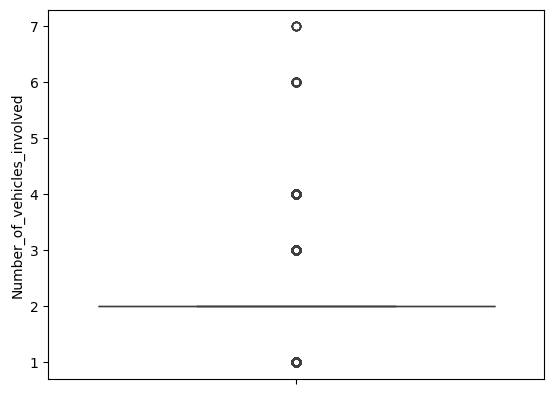

In [893]:
sns.boxplot(ds['Number_of_vehicles_involved'])

In [894]:
# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [895]:
ds_new = remove_outliers(ds,'Number_of_vehicles_involved')

<Axes: ylabel='Number_of_vehicles_involved'>

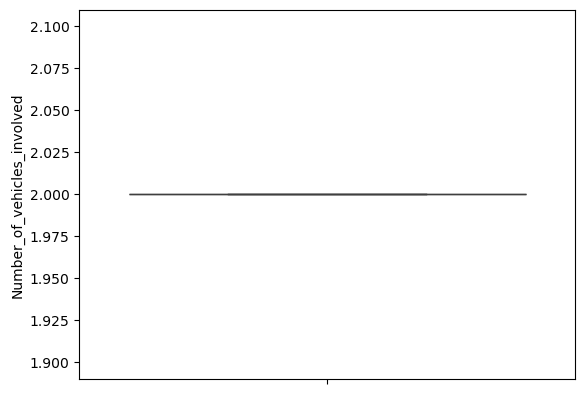

In [896]:
sns.boxplot(ds_new['Number_of_vehicles_involved'])

In [897]:
ds['Nums_of_veh_and_num_cus_ratio'] = ds['Number_of_vehicles_involved'] / ds['Number_of_casualties']
ds

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Nums_of_veh_and_num_cus_ratio
0,420,1,0,1,0,0,0,0,3,3,...,3,2,5,3,0,2,5,9,Slight Injury,1.0
1,420,1,1,1,4,0,3,11,3,2,...,3,2,5,3,0,2,5,16,Slight Injury,1.0
2,420,1,0,1,4,0,0,5,3,5,...,0,1,1,2,0,2,5,0,Serious Injury,1.0
3,594,3,0,1,4,0,2,11,0,5,...,2,0,0,2,0,2,5,1,Slight Injury,1.0
4,594,3,0,1,4,0,1,0,3,2,...,3,2,5,3,0,2,5,16,Slight Injury,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,374,6,1,1,4,0,1,4,3,5,...,3,2,5,3,0,2,5,10,Slight Injury,2.0
12312,476,3,4,1,1,0,2,0,3,5,...,3,2,5,3,0,2,5,10,Slight Injury,2.0
12313,246,3,2,1,4,0,2,1,3,1,...,0,1,1,2,0,2,5,1,Serious Injury,1.0
12314,246,3,0,0,4,0,3,5,3,1,...,3,2,5,3,0,2,5,5,Slight Injury,2.0


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

In [899]:
cor = ds[['Number_of_vehicles_involved','Number_of_casualties']]

ds1=cor.groupby("Number_of_vehicles_involved").agg({"Number_of_casualties":'mean',"Number_of_casualties":'mean',"Number_of_casualties":'mean'} , inplace = True)
print(ds1)

                             Number_of_casualties
Number_of_vehicles_involved                      
1                                        1.256513
2                                        1.505276
3                                        1.948980
4                                        2.413223
6                                        1.571429
7                                        1.000000


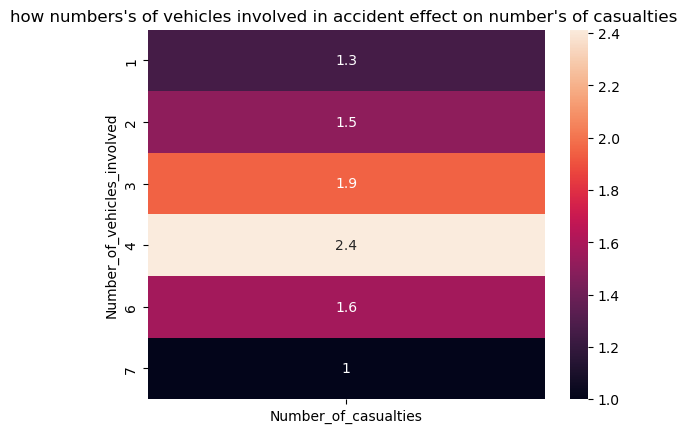

In [900]:
sns.heatmap(ds1 , annot= True)
plt.title("how numbers's of vehicles involved in accident effect on number's of casualties ")
plt.show()

**As we see if the number of vehicles involved in accident increase it will be in some cases increase the number's of casualties**

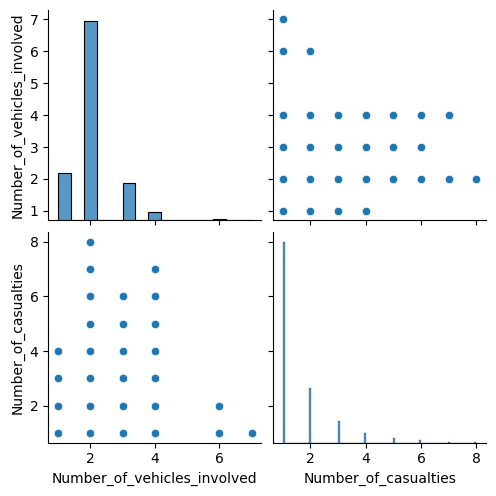

In [902]:
sns.pairplot(cor)
# to show
plt.show()

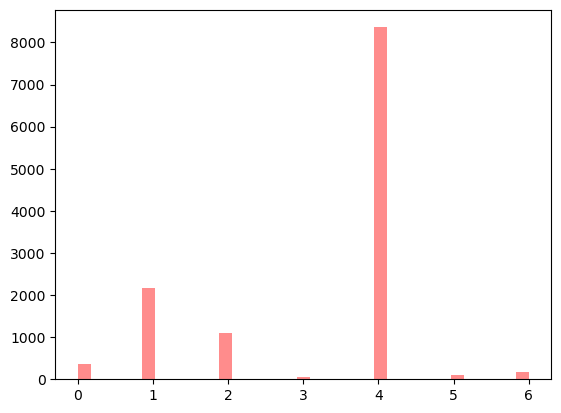

In [903]:
plt.hist(ds['Educational_level'],bins = 35, alpha = 0.45, color = 'red') 
plt.show()

In [904]:
ds['Educational_level'].unique()

array([0, 4, 1, 2, 5, 3, 6])

**The Junior high school student do most of road traffic accidents comparing with other category**

In [906]:
ds['Type_of_vehicle'].unique()

array([ 0, 11,  5, 10,  4,  3,  9, 15,  8, 14, 12,  7,  1, 16,  6, 13,  2])

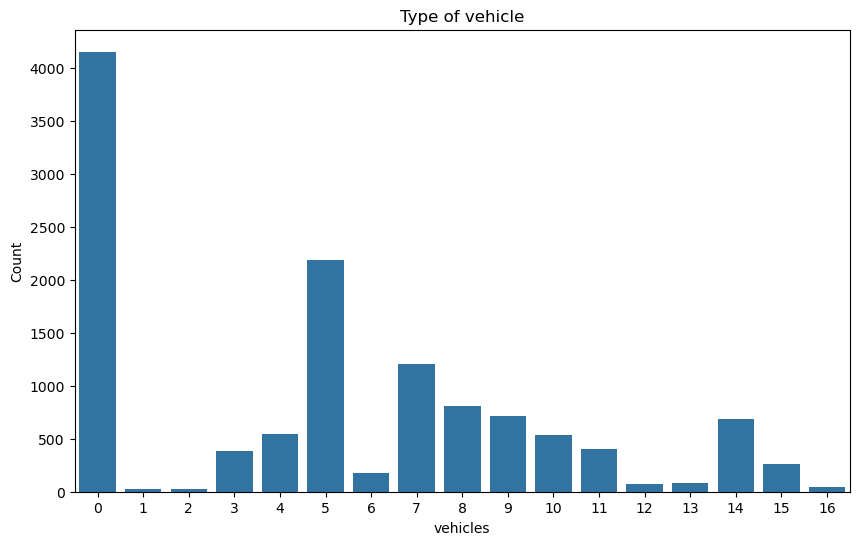

In [907]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type_of_vehicle', data=ds)
plt.title('Type of vehicle')
plt.xlabel('vehicles')
plt.ylabel('Count')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [909]:
X = ds.drop(['Accident_severity','Nums_of_veh_and_num_cus_ratio'],axis=1)

y = ds['Accident_severity']

In [910]:
X.shape

(12316, 31)

In [911]:
X

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident
0,420,1,0,1,0,0,0,0,3,3,...,2,2,3,2,5,3,0,2,5,9
1,420,1,1,1,4,0,3,11,3,2,...,2,2,3,2,5,3,0,2,5,16
2,420,1,0,1,4,0,0,5,3,5,...,2,2,0,1,1,2,0,2,5,0
3,594,3,0,1,4,0,2,11,0,5,...,2,2,2,0,0,2,0,2,5,1
4,594,3,0,1,4,0,1,0,3,2,...,2,2,3,2,5,3,0,2,5,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,374,6,1,1,4,0,1,4,3,5,...,1,2,3,2,5,3,0,2,5,10
12312,476,3,4,1,1,0,2,0,3,5,...,1,4,3,2,5,3,0,2,5,10
12313,246,3,2,1,4,0,2,1,3,1,...,1,4,0,1,1,2,0,2,5,1
12314,246,3,0,0,4,0,3,5,3,1,...,1,4,3,2,5,3,0,2,5,5


In [912]:
y.shape

(12316,)

In [913]:
y

0         Slight Injury
1         Slight Injury
2        Serious Injury
3         Slight Injury
4         Slight Injury
              ...      
12311     Slight Injury
12312     Slight Injury
12313    Serious Injury
12314     Slight Injury
12315     Slight Injury
Name: Accident_severity, Length: 12316, dtype: object

In [914]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [917]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Decision Tree Classifier

In [919]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

#### Support Vector Machine (SVM)

In [921]:
from sklearn import svm
mymodel = svm.SVC()
mymodel.fit(X_train, y_train)

SVC()

#### K-Neighbors Classifier

In [923]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [996]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[   0,    0,   31],
       [   0,    0,  354],
       [   0,    0, 2079]])

In [998]:
# Accuracy
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7767857142857143

In [1002]:
# Precision and Recall
from sklearn.metrics import precision_score
y_pred = mymodel.predict(X_test)
precision_score(y_test, y_pred, average='micro')

0.84375

In [1006]:
from sklearn.metrics import recall_score
y_pred = neigh.predict(X_test)
recall_score(y_test, y_pred, average='micro')

0.8060064935064936

In [1010]:
# F1 Score
from sklearn.metrics import f1_score
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred, average='macro')

0.47385525843569876

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

**Compare Metrics :**
- the higest accuracy i git is when i use Support Vector Machine (SVM) with accuracy core: 0.84375
- in general i face problem with deal in lrage amount of dataset and big number of featurs.

**Evaluate Trade-offs :**

i don't do accuracy, precision, and recall for each 4 model that i trained but i see the f1-score in DT is so small number i think i should work on the data preprocess more to get result butter.

**Justify Your Choice:**

- i think the best model for type of data in my point of view is DecisionTreeClassifier beacuse its take The decision is based on a large amount of questions and this is appropriate in our data.

**Feature Importance:**

the most importent features (Time, Day_of_week, Age_band_of_driver, Educational_level, Type_of_vehicle, Cause_of_accident, Accident_severity)

its talk about importent info that will help the model to do the task will.

**Future Improvements:**

to more work in data and use update meathod to select importent feature that increase the model accuracy in the future. 